## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(study_results)

#mouse_metadata.head()

# Combine the data into a single dataset
mousemerge_df = mouse_metadata.merge(study_results, on='Mouse ID')
mousemerge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
#study_results.index
mousemerge_df['Mouse ID'].count()

print(mousemerge_df['Mouse ID'].nunique())

249


In [3]:
mouse_counts = mousemerge_df['Mouse ID'].value_counts()
mouse_counts

g989    13
o795    10
j755    10
c282    10
v991    10
        ..
n482     1
b447     1
l872     1
v199     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(mousemerge_df)['Mouse ID'].duplicates[0]
mousemerged_df = mousemerge_df[mousemerge_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
mousemerged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mousemerge_df[mousemerge_df.duplicated() ==True].head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
#mousemerge_df.loc[mousemerge_df.Mouse_ID == 'g989']

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#mouse_drop_df = mousemerge_df.drop(Mouse_ID = 'g989')
#mouse_drop_df

In [8]:
# Checking the number of mice in the clean DataFrame.
print(mousemerge_df['Mouse ID'].nunique())
print(mousemerged_df['Mouse ID'].nunique())
#print(mouse_drop_df['Mouse ID'].nunique())

249
1


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
  #tumor_volume = mousemerge_df(['Drug Regimen']).mean()
mouse_mean_df = mousemerge_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
mouse_median_df = mousemerge_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
mouse_var_df = mousemerge_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
mouse_std_df = mousemerge_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
mouse_sem_df = mousemerge_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
mouse_summary_df = pd.DataFrame({'Mean': mouse_mean_df, 
                                'Median': mouse_median_df,
                                'Variance': mouse_var_df,
                                'Standard Deviation': mouse_std_df,
                                'SEM': mouse_sem_df})
mouse_summary_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
summary_df = mousemerge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

<IPython.core.display.Javascript object>


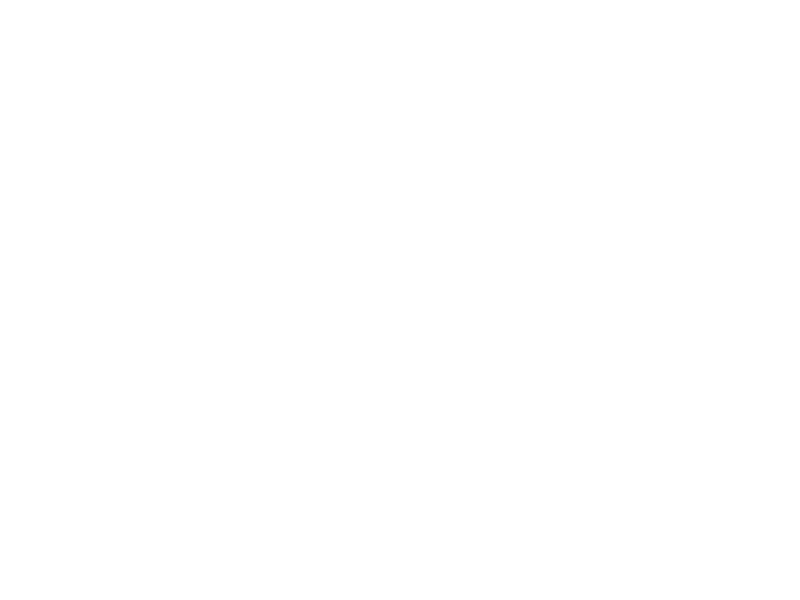

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.
drug_df = mousemerge_df['Drug Regimen'].value_counts()
drug_df.plot(kind='bar')
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Mice per Time Point')

plt.show()
plt.tight_layout()




In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
x_axis = drug_df.index.values
y_axis = drug_df.values

plt.title('Number of Mice per Time Point')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Point')

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis) 
plt.xticks(rotation=45)
#color='r', alpha=0.5, align="center")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

## Pie Plots

In [13]:
mousemerge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
P = mousemerge_df.groupby('Mouse ID')['Sex'].count().reset_index()
P['Percentage'] = 100 * P['Sex']  / P['Sex'].sum()
P

,Mouse ID,Sex,Percentage
0,a203,10,0.528262
1,a251,10,0.528262
2,a262,10,0.528262
3,a275,10,0.528262
4,a366,7,0.369783
...,...,...,...
244,z435,3,0.158479
245,z578,10,0.528262
246,z581,10,0.528262
247,z795,10,0.528262


In [15]:
sex_p = pd.crosstab(mousemerge_df['Mouse ID'],mousemerge_df['Sex']).apply(lambda r: r/r.sum(), axis=1)
sex_pd = sex_p.sum()
#sex_p = pd.crosstab(mousemerged_df['Mouse ID'],mousemerged_df['Sex']).apply(lambda r: r/len(mousemerged_df), axis=1)
#sex_p_t = sex_p.groupby(['Female', 'Male']).sum()
sex_pd



Sex
Female    124.0
Male      125.0
dtype: float64

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_pd.plot(kind='pie')
plt.show()

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
plt.pie(sex_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)

([<matplotlib.patches.Wedge at 0x208d514bc18>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Male'),
  Text(0.7123680187966355, 0.8381717042442776, 'Female')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

## Quartiles, Outliers and Boxplots

In [18]:
mousemerge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 


In [20]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [35]:
mousemerge_df.head()
mmerge_df = mousemerge_df.rename(columns={'Mouse ID': 'Mouse_ID', 'Drug Regimen': 'Regimen'})
mmerge_df

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#cap_df = mousemerge_df.groupby(['Drug Regimen']('Capomulin'))
cap_df = mmerge_df[mmerge_df.Regimen == 'Capomulin']
cap_df


,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [41]:
world_avg, = plt.plot('Tumor Volume (mm3)', cap_df.loc['Mouse_ID', ['Timepoint']])


KeyError: 'Mouse_ID'

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
